In [0]:
from keras.datasets import reuters
import numpy as np
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
import matplotlib.pyplot as plt
import copy

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [3]:
print(len(train_data), len(test_data))

8982 2246


In [4]:
print(train_data[1])

[1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]


## Here's how you can decode it back to words, in case you are curious:

In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [8]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

## The label associated with an example is an integer between 0 and 45: a topic index.

In [9]:
train_labels[0]

3

# Preparing the data

### We can vectorize the data with the exact same code as in our previous example:

In [0]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

# our vectorized training data
x_train = vectorize_sequences(train_data)
# our vectorized test data
x_test = vectorize_sequences(test_data)

In [0]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results

# our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

### Note that there is a built-in way to do this in Keras, which you have already seen in action in our MNIST example:

In [0]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# Building our Notebook

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## Validating our approach

### Let's set apart 1,000 samples in our training data to use as a validation set:

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### Now let's train our network for 20 epochs:

In [20]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 223us/step - loss: 2.5192 - acc: 0.4960 - val_loss: 1.7188 - val_acc: 0.6130
Epoch 2/20
7982/7982 [==============================] - 1s 133us/step - loss: 1.4434 - acc: 0.6879 - val_loss: 1.3476 - val_acc: 0.7100
Epoch 3/20
7982/7982 [==============================] - 1s 147us/step - loss: 1.0948 - acc: 0.7650 - val_loss: 1.1715 - val_acc: 0.7370
Epoch 4/20
7982/7982 [==============================] - 1s 154us/step - loss: 0.8699 - acc: 0.8171 - val_loss: 1.0866 - val_acc: 0.7570
Epoch 5/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.7037 - acc: 0.8488 - val_loss: 0.9861 - val_acc: 0.7850
Epoch 6/20
7982/7982 [==============================] - 1s 150us/step - loss: 0.5665 - acc: 0.8796 - val_loss: 0.9417 - val_acc: 0.8000
Epoch 7/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.4597 - acc: 0.9058 - val_loss: 0.9102 - val_acc: 0.8040


## Let's display its loss and accuracy curves:

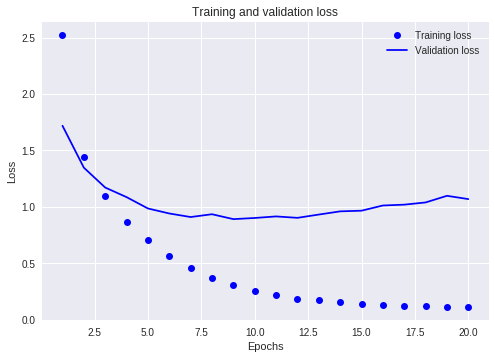

In [22]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

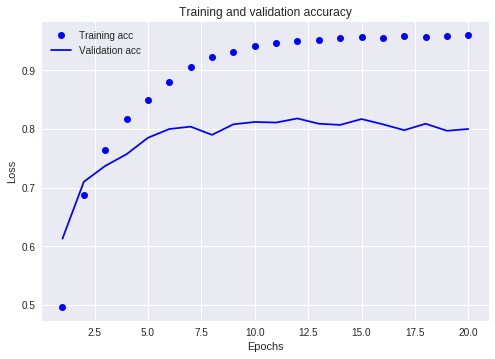

In [23]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## It seems that the network starts overfitting after 8 epochs. Let's train a new network from scratch for 8 epochs, then let's evaluate it on the test set:

In [24]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=8, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 168us/step - loss: 2.5329 - acc: 0.5237 - val_loss: 1.6825 - val_acc: 0.6550
Epoch 2/8
7982/7982 [==============================] - 1s 147us/step - loss: 1.3705 - acc: 0.7137 - val_loss: 1.2746 - val_acc: 0.7190
Epoch 3/8
7982/7982 [==============================] - 1s 146us/step - loss: 1.0118 - acc: 0.7803 - val_loss: 1.1313 - val_acc: 0.7540
Epoch 4/8
7982/7982 [==============================] - 1s 147us/step - loss: 0.7969 - acc: 0.8252 - val_loss: 1.0518 - val_acc: 0.7610
Epoch 5/8
7982/7982 [==============================] - 1s 148us/step - loss: 0.6386 - acc: 0.8632 - val_loss: 0.9732 - val_acc: 0.7960
Epoch 6/8
7982/7982 [==============================] - 1s 154us/step - loss: 0.5109 - acc: 0.8924 - val_loss: 0.9071 - val_acc: 0.8140
Epoch 7/8
7982/7982 [==============================] - 1s 155us/step - loss: 0.4109 - acc: 0.9142 - val_loss: 0.8932 - val_acc: 0.8220
Epoch 8

In [25]:
results

[0.9823192083081919, 0.7858414959928762]

### Our approach reaches an accuracy of 78%. With a balanced binary classification problem, the accuracy reached by a purely random classifier would be 50%, but in our case it is closer to 19%, so our results seem pretty good, at least when compared to a random baseline:

In [27]:
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.19679430097951914

## Generating predictions on new data

#### We can verify that the predict method of our model instance returns a probability distribution over all 46 topics. Let's generate topic predictions for all of the test data:

In [0]:
predictions = model.predict(x_test)

#### Each entry in predictions is a vector of length 46:

In [29]:
predictions[0].shape

(46,)

#### The coefficients in this vector sum to 1:

In [30]:
np.sum(predictions[0])

0.9999999

#### The largest entry is the predicted class, i.e. the class with the highest probability:

In [31]:
np.argmax(predictions[0])

3

## A different way to handle the labels and the loss

In [0]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [0]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [34]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_final = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 233us/step - loss: 2.7063 - acc: 0.4395 - val_loss: 2.0151 - val_acc: 0.5930
Epoch 2/20
7982/7982 [==============================] - 2s 192us/step - loss: 1.7333 - acc: 0.6179 - val_loss: 1.6563 - val_acc: 0.6120
Epoch 3/20
7982/7982 [==============================] - 2s 191us/step - loss: 1.4668 - acc: 0.6359 - val_loss: 1.5681 - val_acc: 0.6050
Epoch 4/20
7982/7982 [==============================] - 1s 188us/step - loss: 1.3256 - acc: 0.6421 - val_loss: 1.4817 - val_acc: 0.6150
Epoch 5/20
7982/7982 [==============================] - 2s 188us/step - loss: 1.2148 - acc: 0.6495 - val_loss: 1.4535 - val_acc: 0.6210
Epoch 6/20
7982/7982 [==============================] - 2s 188us/step - loss: 1.1240 - acc: 0.6758 - val_loss: 1.4347 - val_acc: 0.6320
Epoch 7/20
7982/7982 [==============================] - 2s 188us/step - loss: 1.0499 - acc: 0.6938 - val_loss: 1.4573 - val_acc: 0.6380


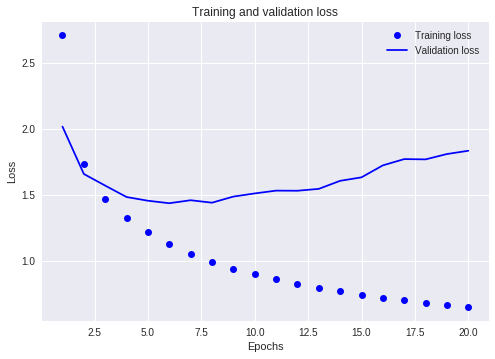

In [35]:
loss = result_final.history['loss']
val_loss = result_final.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

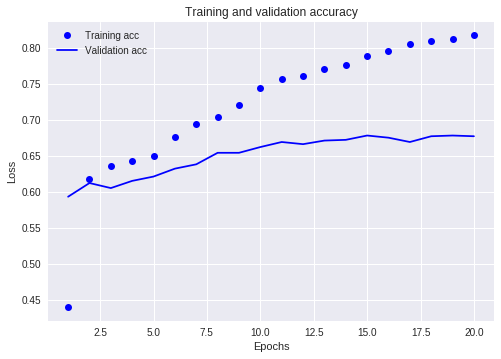

In [36]:
plt.clf()   # clear figure

acc = result_final.history['acc']
val_acc = result_final.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Our network now seems to peak at 71% test accuracy, a 8% absolute drop. This drop is mostly due to the fact that we are now trying to compress a lot of information (enough information to recover the separation hyperplanes of 46 classes) into an intermediate space that is too low-dimensional. The network is able to cram most of the necessary information into these 8-dimensional representations, but not all of it.